# Matplotlib Exercises

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Set `day` to today's day of the month. We want to compare the temperatures for this day in Boston and NYC. We will use data that goes back to the last century, and some more.

In [34]:
day = 9

print("Today is July " + str(day))

Today is July 9


Let's import two tables: 1) July temperatures in Boston, MA, from 1893 to 2023, and 2) July temperatures in NYC, New York, from 1869 to 2023. All temperatures are reported in degrees Celsius.

Below are the temperatures in degrees Celsius for this day in Boston (1893-2023). Plot the dates on the x-axis and temperatures on the y-axis.

In [35]:
boston_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/Boston_July_Temp.csv'
boston = pd.read_csv(boston_url, index_col=[0])

col = 'July' + str(day) # get column specific to today's date
temp_boston = boston[col]

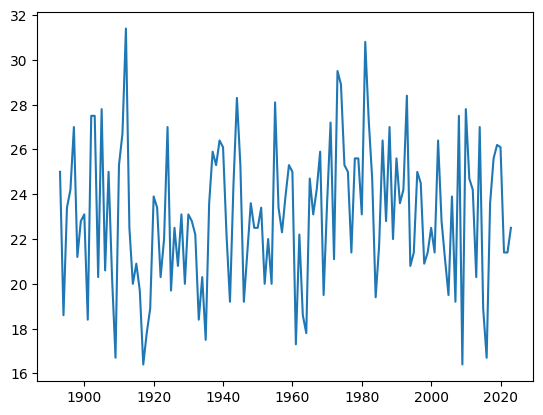

In [36]:
plt.plot(temp_boston)

Now below are the temperatures in degrees Celsius for this day in New York City (1869-2023). Plot the temperatures of Boston and NYC on the same graph in different colors. Hint: notice the difference in range of years

In [37]:
nyc_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/NYC_July_Temp.csv'
nyc = pd.read_csv(nyc_url)

col = 'July' + str(day) # get column specific to today's date
temp_nyc = nyc[col][24:] # <-- Modify this to get a set of temperatures that line up with the Boston data above

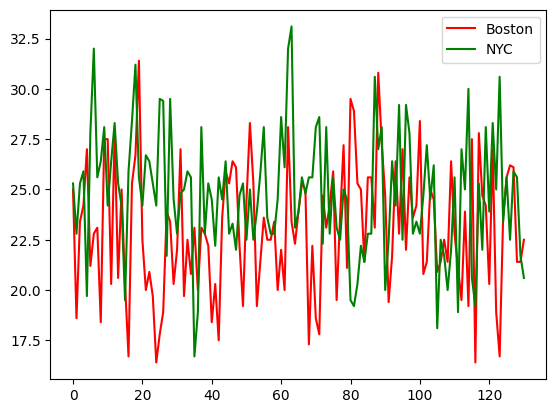

In [39]:
plt.plot(np.array(temp_boston)[::-1], color='red')
plt.plot(np.array(temp_nyc), color='green')
plt.legend(['Boston', 'NYC'])

Plot the temperatures of Boston and NYC on different graphs in the same figure.

Text(0.5, 1.0, 'NYC')

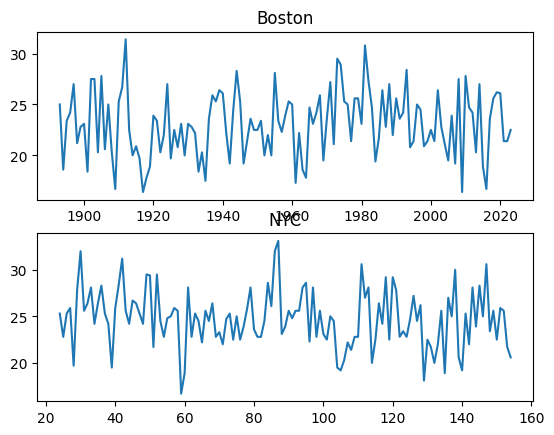

In [40]:
fig, axes = plt.subplots(2)
axes[0].plot(temp_boston)
axes[0].set_title("Boston")
axes[1].plot(temp_nyc)
axes[1].set_title("NYC")

## Univariate Analysis

Read the csv file into a DataFrame and print the first 7 rows

In [3]:
url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/BWSI_Dataset1.csv"

data = pd.read_csv(url)
data.head(7)

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,...,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,...,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,...,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,...,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,...,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,...,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1
5,6,6,2,23,1,1,6,6,97.82,205.70,...,527.91,3226.97,32.13,59.8,158.9,23.68,566,2,2,2
6,7,5,2,53,3,3,1,6,34.59,227.03,...,33.50,5367.00,15.65,69.9,164.2,25.93,897,2,2,5


Conduct a Univariate Analysis of the participants' Cholesterol. What is noticeable about it? Create a function that normalizes the participants' Cholesterol and create two visualizations, one before the `"Chol"` data is modified, and one after normalizing the `"Chol"` data.

array([[<AxesSubplot: title={'center': 'Chol'}>]], dtype=object)

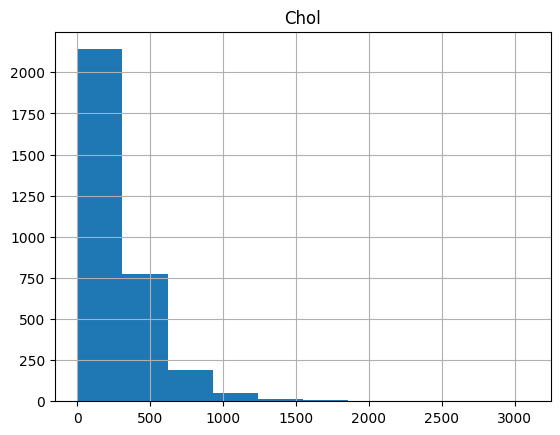

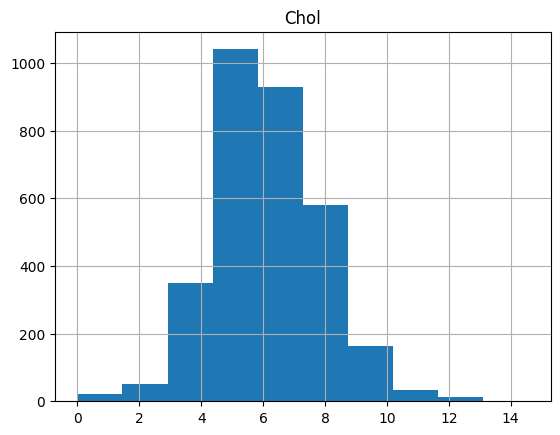

In [ ]:
data.hist(column='Chol') # skew right, before normalization
dataFixed = data.copy()
dataFixed['Chol'] = np.cbrt(dataFixed['Chol'])
dataFixed.hist(column='Chol') # roughly normal distribution 

## Bivariate Analysis

Conduct a Bivariate Analysis for `"Protein"` and `"Chol"`. What is familar about this compared to the tutorial? What is another way to deal with overplotting other than the Hex plot? Create two data visualizations, one that shows the overplotting, another that resolves this issue. After you are done, play around with the `sns.kdeplot` function or try to create a 3D graph to reduce the effects of overplotting.

0.5989759706598324

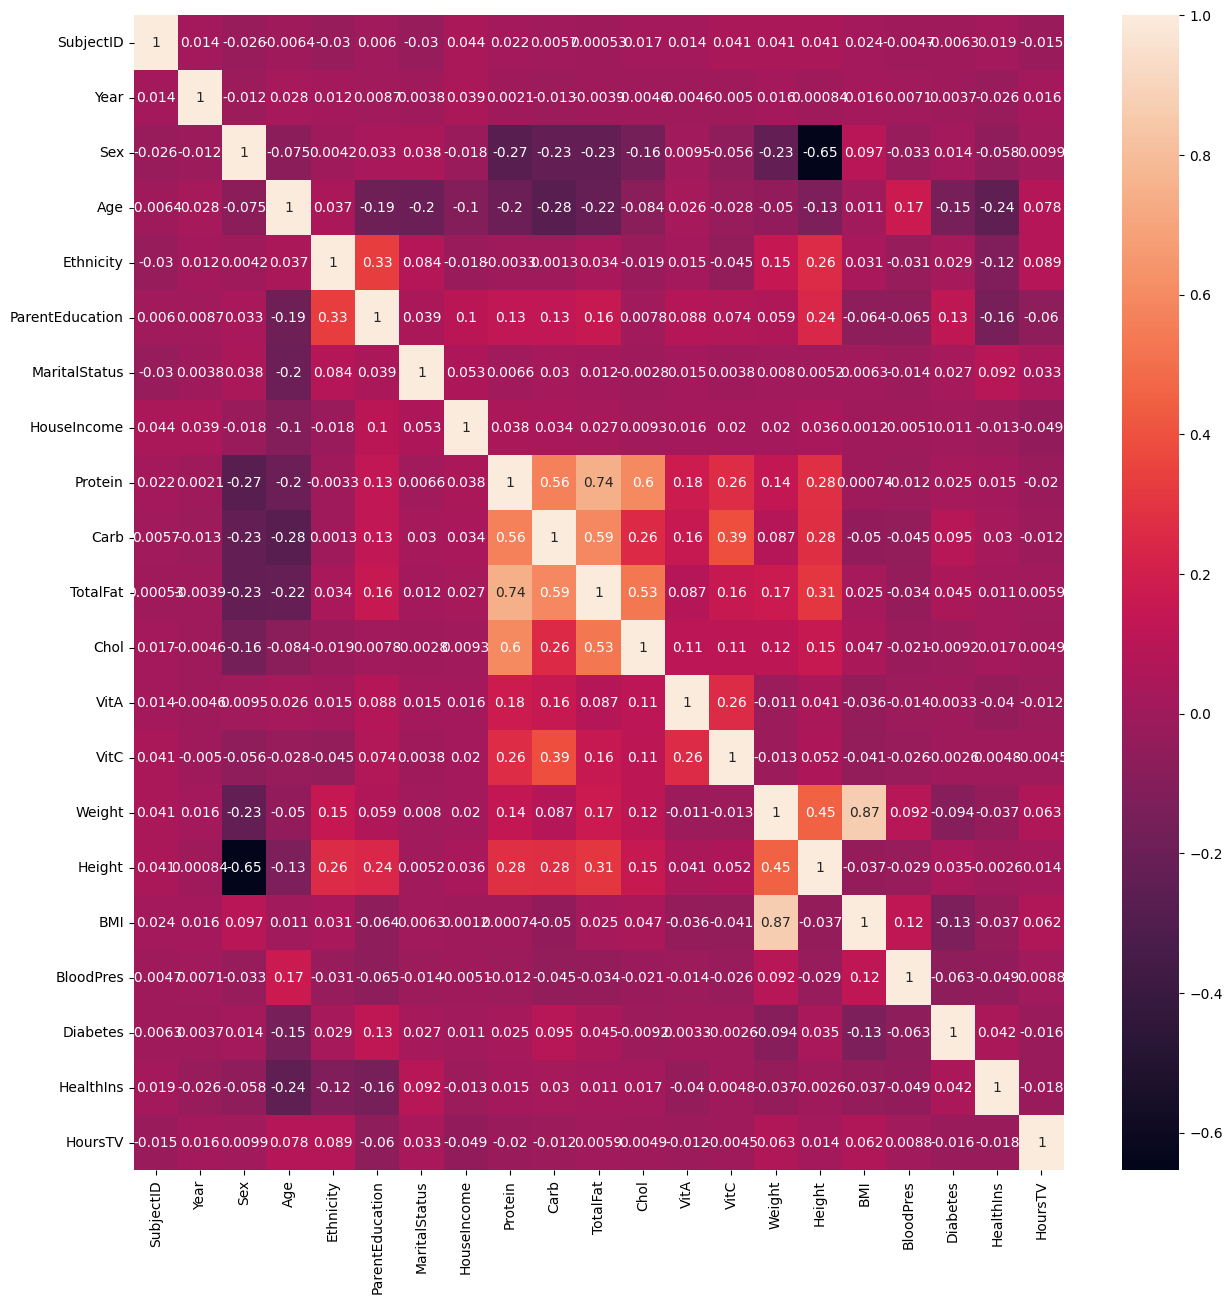

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True) # correlation matrix seems to be the same as in the tutorial
data['Chol'].corr(data['Protein']) # pretty high

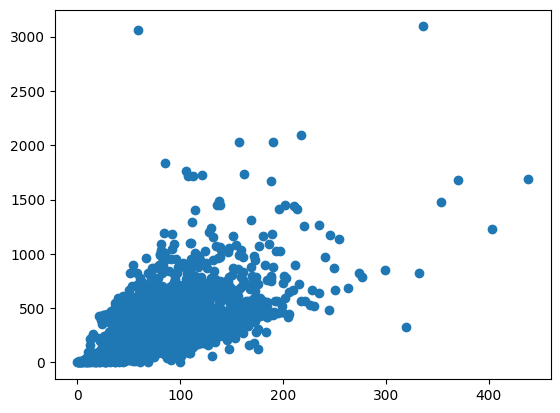

In [6]:
plt.scatter(data['Protein'], data['Chol'])

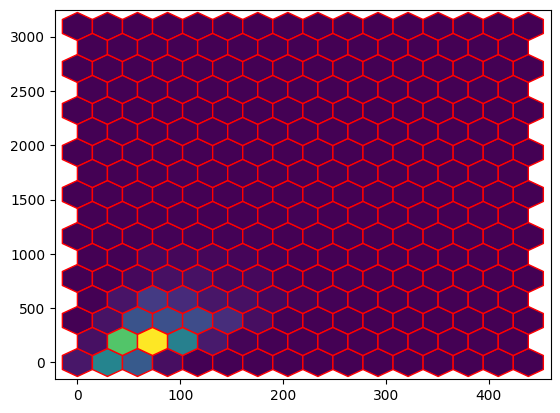

In [9]:
plt.hexbin(data['Protein'],data['Chol'], gridsize = 15, ec = "r")

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


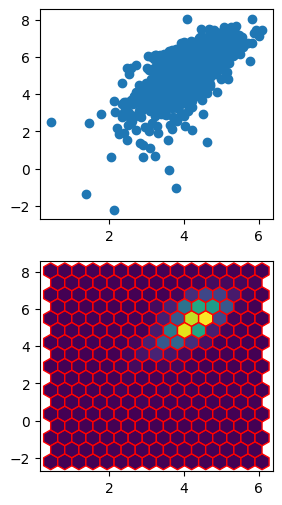

In [30]:
fig, axes = plt.subplots(2,1,figsize=(3,6))
dataScaled = data.copy()
dataScaled['Protein'] = np.log(data['Protein'])
dataScaled['Chol'] = np.log(dataScaled['Chol'])
axes[0].scatter(dataScaled['Protein'], dataScaled['Chol'])
axes[1].hexbin(dataScaled['Protein'],dataScaled['Chol'], gridsize = 15, ec = "r")

If you have time here are some challenge Python problems.

---

As depicted below, create a numpy array of zeros (a) and an array of ones (b). Using slicing and assignment, update a using b, so that a is the array on the right side of the arrow.

Hint: use `np.zeros` and `np.ones`.

In [ ]:
# 0 0 0 0 0 0                  0 0 0 0 0 0
# 0 0 0 0 0 0    1 1 1  --->   0 0 0 0 0 0
# 0 0 0 0 0 0    1 1 1         0 0 1 1 1 0
# 0 0 0 0 0 0                  0 0 1 1 1 0

In [ ]:
# YOUR CODE HERE
a = np.zeros((4,6))
b = np.ones((2,3))
print(a)
print(b)
print('----')
a[2:4, 2:5] = b
print(a)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
----
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]]


Fill in the function below. The function recieves a non-empty string and an int `n` and returns a new string where the character at index `n` has been removed.

In [ ]:
def remove_char(old_string, n):
    new_string = old_string[:n] + old_string[n+1:]

    return new_string

remove_char("words", 1)

'wrds'

Given a string, return a new string where the first and last characters have been exchanged.

In [ ]:
def swap_chars(old_string):
    return old_string[-1] + old_string[1:-1] + old_string[0]

Test the function with 3 different parameters.

In [ ]:
print(swap_chars("helloworld"))
print(swap_chars("abcd"))
print(swap_chars("According to all known laws of aviation, there is no way a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossible."))

delloworlh
dbca
.ccording to all known laws of aviation, there is no way a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossibleA


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cca5f50-39f8-471d-8735-226387513f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>